In [94]:
import numpy as np
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1.1

In [95]:
def approx_noise():
    final = np.zeros((48000, 5))
    for i in range(5):
        file_name = 'noise' + str(i+1) + '.wav'
        f, w = wavfile.read(filename=file_name)
        ns = np.fft.fft(w)
        nss = np.abs(ns)
        n_tilda = np.zeros(nss.shape)
        for j in range(1,nss.shape[0]):
            n_tilda[j] = (0.8 * nss[j-1]) + (0.2 * nss[j])
            
        final[:,i] = n_tilda
    
    final_mean = np.mean(final, axis=1)
    
    return final_mean

# 1.2

In [96]:
infile = 'noisy_sound.wav'
fs, sr = wavfile.read(infile)
s= np.fft.fft(sr)    
ss= np.abs(s)         # getting magnitude
angle= np.angle(s)    # getting phase
b=np.exp(1.0j* angle) # phase information

f = approx_noise()  # function calling to get computed averaged noise

xs = ss - f
xs0 = xs * b
y = np.fft.ifft(xs0)
outfile = 'out.wav'
wavfile.write(outfile, fs, (y * 32768).astype(np.int16))


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


c:\programdata\miniconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'|Y(freq)|')

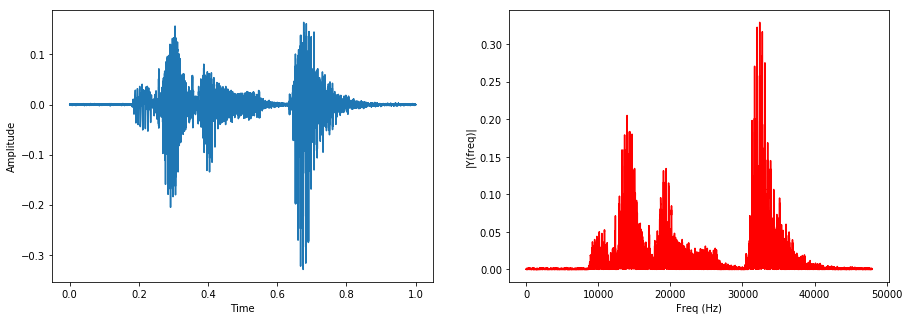

In [97]:

Ts = 1.0/fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
n = len(y) # length of the signal
k = np.arange(n)
T = n/fs
frq = k/T # two sides frequency range
frq = frq[range(n)] # one side frequency range

z = y[range(n)]
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].plot(t,z)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(z),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')